# The real flow by averaging the velocities

In [1]:
import pandas as pd
import numpy as np
import os
data_dir = '/cosma8/data/do012/dc-he4/analysis'
# data/analysis/lc0004/samples_in_lightcone0004_duplicate_excision_outlier_excision.csv


ubf_real = []
v2_median = []
v2_low = []
v2_up = []
for lc in range(1728):
    lc00 = f'{lc:04d}'
    
    # filename
    filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'

    if os.path.exists(filename):
        df = pd.read_csv(filename)
        
        # Calculate the average velocities
        Vx = np.mean(df['Vx'].values)
        Vy = np.mean(df['Vy'].values)
        Vz = np.mean(df['Vz'].values)
        ubf = np.sqrt(Vx**2 + Vy**2 + Vz**2)   # sum of velocities
        ubf_real.append(ubf)

        # Also the magnitude
        v2 = np.sqrt(df['Vx'].values**2 + df['Vy'].values**2 + df['Vz'].values**2)
        v2_median.append(np.median(v2))
        v2_low.append(np.min(v2))
        v2_up.append(np.max(v2))
        

ubf_real = np.array(ubf_real) # to array
v2_median = np.array(v2_median)
v2_low = np.array(v2_low)
v2_up = np.array(v2_up)

In [2]:
ubf_real, ubf_real.shape

(array([77.31681688, 23.14745913, 51.61411739, ..., 35.89716523,
        22.03219203, 57.79743298]),
 (1728,))

In [4]:
def range_check(arr):
    low = np.nanpercentile(arr, 16)
    up = np.nanpercentile(arr, 84)
    median = np.median(arr)
    print(f'{median:.2f} + {up - median:.2f} - {median - low:.2f}')
    print(f'{np.nanmin(arr):.2f} to {np.nanmax(arr):.2f}')
    return median, low, up

In [5]:
# The real bulk flow amplitude
range_check(ubf_real)

63.62 + 31.01 - 26.05
5.48 to 169.45


(63.615418992651925, 37.570377471719794, 94.62248837284311)

In [14]:
# The average magnitude of velocity
range_check(v2_low)
range_check(v2_median)
range_check(v2_up)

41.31 + 13.39 - 15.54
25.77 to 54.70
452.18 + 15.02 - 13.67
438.51 to 467.20
1436.31 + 186.57 - 129.39
1306.92 to 1622.89


(1436.3112687830933, 1306.917047481535, 1622.8855594141721)

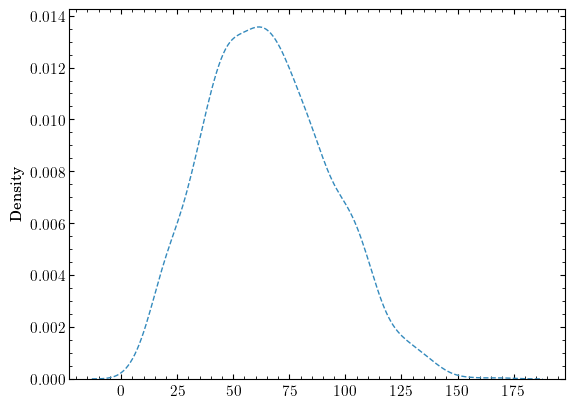

In [10]:
# Make a plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('nice.mplstyle')

# Make a nice kde plot
sns.kdeplot(ubf_real)
plt.show()

# As a function of redshift

In [30]:
import pandas as pd
import numpy as np
import os
data_dir = '/cosma8/data/do012/dc-he4/analysis'
# data/analysis/lc0004/samples_in_lightcone0004_duplicate_excision_outlier_excision.csv

ubf_z_all = np.array([])
for z in np.arange(0.02, 0.18, 0.01):
    ubf_z = []
    for lc in range(1728):
        lc00 = f'{lc:04d}'
        
        # filename
        filename = f'{data_dir}/lc{lc00}/samples_in_lightcone{lc00}_duplicate_excision_outlier_excision.csv'

        if os.path.exists(filename):
            df = pd.read_csv(filename)
            zmask = (df['ObservedRedshift'].values < z)
            df = df[zmask]
            
            # Calculate the average velocities
            Vx = np.mean(df['Vx'].values)
            Vy = np.mean(df['Vy'].values)
            Vz = np.mean(df['Vz'].values)
            ubf = np.sqrt(Vx**2 + Vy**2 + Vz**2)   # sum of velocities

            # Append to list
            ubf_z.append(ubf)

    # to array
    ubf_z = np.array(ubf_z)

    # combine
    if len(ubf_z_all) == 0:
        ubf_z_all = ubf_z                          # first entry
    else:
        ubf_z_all = np.vstack((ubf_z_all, ubf_z))    # stack on the first indices

    print(np.shape(ubf_z_all))

(1728,)
(2, 1728)
(3, 1728)
(4, 1728)
(5, 1728)
(6, 1728)
(7, 1728)
(8, 1728)
(9, 1728)
(10, 1728)
(11, 1728)
(12, 1728)
(13, 1728)
(14, 1728)
(15, 1728)
(16, 1728)


In [31]:
# Make plots and number checks
i = 0 # walk the ubf_z_all array
dict = {}
dict['z']   = []
dict['ubf'] = []
dict['ubf_low_err'] = []
dict['ubf_up_err']  = []

# copy from above cell
for z in np.arange(0.02, 0.18, 0.01):
    # print the redshfit we are using
    print(f'z = {z:.3g}')

    # ubf_z
    ubf_z = ubf_z_all[i, :]

    # Get 16th, 50th, 84th percentiles
    low_ubf = np.nanpercentile(ubf_z, 16)
    up_ubf = np.nanpercentile(ubf_z, 84)
    median_ubf = np.nanmedian(ubf_z)
    print(f'{median_ubf:.3g} + {up_ubf - median_ubf:.3g} - {median_ubf - low_ubf:.3g}')

    i += 1 # traverse all zs

    dict['z'].append(z)
    dict['ubf'].append(median_ubf)
    dict['ubf_low_err'].append(up_ubf - median_ubf)
    dict['ubf_up_err'].append(median_ubf - low_ubf)

# dataframe
df_out = pd.DataFrame(dict)

# save
df_out.to_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/bf_truth.csv')


z = 0.02
125 + 59.9 - 49.1
z = 0.03
109 + 55.1 - 44.1
z = 0.04
101 + 48 - 40.4
z = 0.05
94.2 + 46 - 37.2
z = 0.06
90 + 43.2 - 35.4
z = 0.07
86.3 + 39.8 - 34.6
z = 0.08
82.2 + 38.2 - 32.8
z = 0.09
78.9 + 36.4 - 31.7
z = 0.1
75.4 + 36.2 - 30.3
z = 0.11
72.6 + 34.6 - 29.2
z = 0.12
70.6 + 34.3 - 28.5
z = 0.13
68.3 + 33.5 - 27.1
z = 0.14
66.1 + 32.8 - 26.4
z = 0.15
64.6 + 32.4 - 26.2
z = 0.16
64.5 + 31.6 - 26.5
z = 0.17
64.2 + 32.4 - 26.1
